In [1]:
import pandas as pd
import numpy as np

In [2]:
train=pd.read_csv('titanic/train.csv')

In [3]:
train.info() ### SibSp=사촌+배우자의 수
             ### Parch  =부모+아이 수
             ### Embarked= 선착장
             ### Cabin  = 객실

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train.isnull().sum()### fillna()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- 분류 - classification  칼럼을 도출
- 회귀- regulartion  값을 도출

In [6]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
train['PassengerId'].value_counts()

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64

In [8]:
train['Fare'].value_counts().sort_values()

10.5167     1
25.5875     1
8.4333      1
8.3625      1
32.3208     1
           ..
26.0000    31
7.7500     34
7.8958     38
13.0000    42
8.0500     43
Name: Fare, Length: 248, dtype: int64

In [9]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [10]:
train.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [11]:
train.groupby('Age')['Survived'].value_counts()[:50]

Age    Survived
0.42   1            1
0.67   1            1
0.75   1            2
0.83   1            2
0.92   1            1
1.00   1            5
       0            2
2.00   0            7
       1            3
3.00   1            5
       0            1
4.00   1            7
       0            3
5.00   1            4
6.00   1            2
       0            1
7.00   0            2
       1            1
8.00   0            2
       1            2
9.00   0            6
       1            2
10.00  0            2
11.00  0            3
       1            1
12.00  1            1
13.00  1            2
14.00  0            3
       1            3
14.50  0            1
15.00  1            4
       0            1
16.00  0           11
       1            6
17.00  0            7
       1            6
18.00  0           17
       1            9
19.00  0           16
       1            9
20.00  0           12
       1            3
20.50  0            1
21.00  0           19
       1        

In [12]:
import seaborn as sns

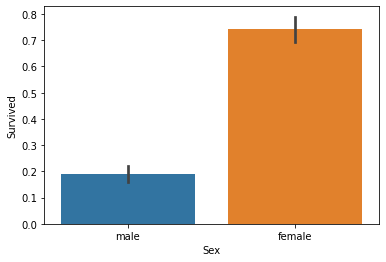

In [13]:
sns.barplot(data=train, x='Sex', y='Survived');

In [14]:
train.groupby('SibSp')['Parch'].value_counts()

SibSp  Parch
0      0        537
       1         38
       2         29
       5          2
       3          1
       4          1
1      0        123
       1         57
       2         19
       3          3
       4          3
       5          3
       6          1
2      0         16
       1          7
       2          4
       3          1
3      1          7
       2          7
       0          2
4      1          9
       2          9
5      2          5
8      2          7
Name: Parch, dtype: int64

In [15]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [16]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [17]:
train[["Sex", "Survived"]].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [18]:
train[["SibSp", "Survived"]].groupby(['SibSp']).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [19]:
train[["Parch", "Survived"]].groupby(['Parch']).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [20]:
train.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [21]:
train.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [22]:
train.groupby('SibSp')['Survived'].mean().sort_values(ascending=False)

SibSp
1    0.535885
2    0.464286
0    0.345395
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [23]:
train.groupby('Parch')['Survived'].mean().sort_values(ascending=False)

Parch
3    0.600000
1    0.550847
2    0.500000
0    0.343658
5    0.200000
4    0.000000
6    0.000000
Name: Survived, dtype: float64

In [24]:
train.groupby('Embarked')['Survived'].mean().sort_values(ascending=False)

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [25]:
train.groupby(['Sex','Pclass'])['Survived'].mean().sort_values(ascending=False)

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

In [26]:
###클래스별 요금의 평균

In [27]:
train.groupby('Fare')['Pclass'].mean().sort_values(ascending=False)



Fare
21.0750     3.0
11.2417     3.0
14.4542     3.0
14.4000     3.0
14.1083     3.0
           ... 
52.0000     1.0
51.8625     1.0
51.4792     1.0
50.4958     1.0
512.3292    1.0
Name: Pclass, Length: 248, dtype: float64

In [28]:
train.groupby('Embarked')['Fare'].mean().sort_values(ascending=False)


Embarked
C    59.954144
S    27.079812
Q    13.276030
Name: Fare, dtype: float64

In [29]:
train.groupby(['Sex','Pclass'])['Survived','Fare'].mean().sort_values(by='Fare', ascending=False)

C:\Users\user\AppData\Local\Temp\ipykernel_7204\3844964061.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train.groupby(['Sex','Pclass'])['Survived','Fare'].mean().sort_values(by='Fare', ascending=False)


,,Survived,Fare
Sex,Pclass,,
female,1,0.968085,106.125798
male,1,0.368852,67.226127
female,2,0.921053,21.970121
male,2,0.157407,19.741782
female,3,0.500000,16.118810
male,3,0.135447,12.661633


In [30]:
train.groupby(['Sex','Pclass'])['Survived','Fare'].mean()

C:\Users\user\AppData\Local\Temp\ipykernel_7204\1482102780.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train.groupby(['Sex','Pclass'])['Survived','Fare'].mean()


Survived        Fare
Sex    Pclass                      
female 1       0.968085  106.125798
       2       0.921053   21.970121
       3       0.500000   16.118810
male   1       0.368852   67.226127
       2       0.157407   19.741782
       3       0.135447   12.661633

In [31]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
train.groupby('Sex')['Age'].median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [33]:
train.groupby('Sex')['Age'].median().values[0]

27.0

In [34]:
train2=train.copy()

In [35]:
train2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [36]:
train2['Age'].fillna(train.groupby('Sex')['Age'].transform('median'),inplace=True)
### na값을 중앙값으로 바꿔주기

In [37]:
train2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
train2.groupby('Sex')['Age'].transform('median')

0      29.0
1      27.0
2      27.0
3      27.0
4      29.0
       ... 
886    29.0
887    27.0
888    27.0
889    29.0
890    29.0
Name: Age, Length: 891, dtype: float64

In [39]:
train2['Age'].fillna(train2.groupby('Sex')['Age'].transform('median'))

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    27.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [40]:
train2['Age'].fillna(train2.groupby('Sex')['Age'].median())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    27.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [41]:
train2['Age'].fillna(train2.groupby('Sex')['Age'].transform('median'))

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    27.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [42]:
train['Name'].head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [43]:
train['Name'].str.lower().str.contains('mr.').value_counts()

True     647
False    244
Name: Name, dtype: int64

In [44]:
train['Name'].str.lower().str.contains('mrs.').value_counts()

False    762
True     129
Name: Name, dtype: int64

In [45]:
train['Name'].str.lower().str.contains('miss.').value_counts()

False    709
True     182
Name: Name, dtype: int64

In [46]:
train['Name'].str.lower().str.contains('dr.').value_counts()

False    859
True      32
Name: Name, dtype: int64

In [47]:
train['Name'][:20]

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

### 정규표현식

In [48]:
train['Name'].str.extract('[a-zA-Z]+')###==숫자 pattern contains no capture groups->없을 시

ValueError: pattern contains no capture groups

In [49]:
ai = "1234"

In [50]:
pat = re.compile("[0-9]+")
re.findall(pat, ai)

NameError: name 're' is not defined

In [51]:
pat3 = "([0-9]{6}[-][0-9]{7})"

In [52]:
email_check = re.compile("([0-9]{2,3}[-][0-9]{3,4}[-][0-9]{4})")

NameError: name 're' is not defined

In [53]:
phone = "02-336-1234"

In [54]:
\w = word
\d = digit
\s = space

SyntaxError: unexpected character after line continuation character (3437016674.py, line 1)

In [55]:
re.findall(email_check, phone)

NameError: name 're' is not defined

In [56]:
train['Name'].str.extract("(\w+\s+\w+)")

,0
0,Owen Harris
1,John Bradley
2,NaN
3,Jacques Heath
4,William Henry
...,...
886,NaN
887,Margaret Edith
888,Catherine Helen
889,Karl Howell


In [57]:
train['Name'].str.extract('(["][a-zA-Z]+["])')

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
886,NaN
887,NaN
888,"""Carrie"""
889,NaN


In [58]:
train['Name'].str.extract('([a-zA-Z]+)')

,0
0,Braund
1,Cumings
2,Heikkinen
3,Futrelle
4,Allen
...,...
886,Montvila
887,Graham
888,Johnston
889,Behr


In [59]:
train['Name'].str.extract('([^0-9]+[,])')

,0
0,"Braund,"
1,"Cumings,"
2,"Heikkinen,"
3,"Futrelle,"
4,"Allen,"
...,...
886,"Montvila,"
887,"Graham,"
888,"Johnston,"
889,"Behr,"


In [60]:
train['Name'].str.extract('([a-zA-Z]+[,])')

,0
0,"Braund,"
1,"Cumings,"
2,"Heikkinen,"
3,"Futrelle,"
4,"Allen,"
...,...
886,"Montvila,"
887,"Graham,"
888,"Johnston,"
889,"Behr,"


In [61]:
# 문자열인 데이터 1개 이상 있을 때의 패턴


In [62]:
import re

In [63]:
a = "안녕하세요 어서오세요"

In [64]:
pat = "[가-힣]+"

In [65]:
re.findall(pat, a)

['안녕하세요', '어서오세요']

In [66]:
train['Name'].str.extract('([a-zA-z]+[.])')

,0
0,Mr.
1,Mrs.
2,Miss.
3,Mrs.
4,Mr.
...,...
886,Rev.
887,Miss.
888,Miss.
889,Mr.


In [67]:
train['Name'].str.extract('([(][a-zA-Z ]*[)])')

,0
0,NaN
1,(Florence Briggs Thayer)
2,NaN
3,(Lily May Peel)
4,NaN
...,...
886,NaN
887,NaN
888,NaN
889,NaN


In [68]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [69]:
train['Name'].str.extract('([(][a-zA-Z ]+[)])')

,0
0,NaN
1,(Florence Briggs Thayer)
2,NaN
3,(Lily May Peel)
4,NaN
...,...
886,NaN
887,NaN
888,NaN
889,NaN


In [70]:
train['Name'].str.extract('([a-zA-z]+[,]+\s+\w+[.]+)')

,0
0,"Braund, Mr."
1,"Cumings, Mrs."
2,"Heikkinen, Miss."
3,"Futrelle, Mrs."
4,"Allen, Mr."
...,...
886,"Montvila, Rev."
887,"Graham, Miss."
888,"Johnston, Miss."
889,"Behr, Mr."


In [71]:
train['Name'].str.extract('([a-zA-Z]+),')

,0
0,Braund
1,Cumings
2,Heikkinen
3,Futrelle
4,Allen
...,...
886,Montvila
887,Graham
888,Johnston
889,Behr


In [72]:
train['Name'].str.extract('([(])+')

,0
0,NaN
1,(
2,NaN
3,(
4,NaN
...,...
886,NaN
887,NaN
888,NaN
889,NaN


In [73]:
train['Name'].str.extract('([a-zA-Z]+\.)')

,0
0,Mr.
1,Mrs.
2,Miss.
3,Mrs.
4,Mr.
...,...
886,Rev.
887,Miss.
888,Miss.
889,Mr.


In [74]:
train['Name'].str.extract('([a-zA-Z]+)[.]')### 위에 것과 같다. \.=[.]

,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [75]:
train['Title']=train['Name'].str.extract('([a-zA-Z]+)\.')

In [76]:
train[['Name','Title']]

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr
...,...,...
886,"Montvila, Rev. Juozas",Rev
887,"Graham, Miss. Margaret Edith",Miss
888,"Johnston, Miss. Catherine Helen ""Carrie""",Miss
889,"Behr, Mr. Karl Howell",Mr


In [77]:
train['Name'].str.extract('[(]([a-zA-Z ]*)[)]')

,0
0,NaN
1,Florence Briggs Thayer
2,NaN
3,Lily May Peel
4,NaN
...,...
886,NaN
887,NaN
888,NaN
889,NaN


In [78]:
train['Name'].str.extract('([(][a-zA-Z ]*[)])')

,0
0,NaN
1,(Florence Briggs Thayer)
2,NaN
3,(Lily May Peel)
4,NaN
...,...
886,NaN
887,NaN
888,NaN
889,NaN


In [79]:
train['Name'].str.extract('[(]([a-zA-Z ]+)[)]')

,0
0,NaN
1,Florence Briggs Thayer
2,NaN
3,Lily May Peel
4,NaN
...,...
886,NaN
887,NaN
888,NaN
889,NaN


In [80]:
train['Name'].str.extract('[(]([a-zA-Z ])+[)]')

,0
0,NaN
1,r
2,NaN
3,l
4,NaN
...,...
886,NaN
887,NaN
888,NaN
889,NaN


In [81]:
train[['Name','Title']]

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr
...,...,...
886,"Montvila, Rev. Juozas",Rev
887,"Graham, Miss. Margaret Edith",Miss
888,"Johnston, Miss. Catherine Helen ""Carrie""",Miss
889,"Behr, Mr. Karl Howell",Mr


In [82]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [83]:
maping={'Mr':0,'Miss':1,'Mrs':2,'Master':3,'Dr':3,'Rev':3,'Mlle':3,
'Major':3,
'Col':3,
'Countess':3,
'Capt':3,
'Ms':3,
'Sir':3,
'Lady':3,
'Mme':3,
'Don':3,
'Jonkheer':3}

In [84]:
train['Title2']=train['Title'].map(maping)

In [85]:
train['Title2'].value_counts()

0    517
1    182
2    125
3     67
Name: Title2, dtype: int64

In [86]:
title_map= {}
for value, key in enumerate(train['Title'].unique()):
    if value >=3:
        title_map[key]=3
    else:
        title_map[key]=value
        
        
            
        

In [ ]:
title_map

In [ ]:
train['Title']=train['Title'].str.lower()
title_map= {}
for title in train['Title'].unique():
    if title =='mr':
        title_map[title]=0
    elif title =='miss':
        title_map[title]=1
    elif title =='mrs':
        title_map[title]=2
    else:
         title_map[title]=3
  

In [ ]:
title_map

In [ ]:
train['Title'].map(title_map)

In [ ]:
train['Title2']=train['Title'].map(title_map)

In [ ]:
train['Title2'].value_counts()

In [ ]:
def title_mapping(title):
    if title =='mr':
        return 0
    elif title =='miss':
        return 1
    elif title =='mrs':
        return 2
    else:
         return 3
  

In [ ]:
train['Title3']=train['Title'].apply(title_mapping)

In [ ]:
train['Title3'].value_counts()

In [ ]:
train['Title']=np.where(train['Title']=='mr',0,
np.where(train['Title']=='miss',1,
np.where(train['Title']=='mrs',2,3)))

In [ ]:
train['Title3'].value_counts()

In [ ]:
train.groupby('Title3')['Age'].median()

In [ ]:
train['Title3']

In [ ]:
train['Age']=train['Age'].fillna(train.groupby('Title')['Age'].transform('median'))

In [ ]:
train['Age'].isnull().sum()

In [ ]:
train['Title']

In [ ]:
import seaborn as sns

In [ ]:
facet=sns.FacetGrid(train, hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age', shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

In [ ]:
facet=sns.FacetGrid(train, hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age', shade=True)
facet.set(xlim=(0,20))
facet.add_legend()

In [ ]:
#  child(~16):0  
# young(17~26):1  
# adult(27~36):2  
# mid-age(37~62):3  
# senior(63~):4

In [ ]:
np.whrer(train['Age']<16,'

In [ ]:
train['Age']=np.where(train['Age']<=16,0,
np.where(train['Age']<=26,1,
np.where(train['Age']<=36,2,
np.where(train['Age']<=62,3,4))))         

In [ ]:
train['Age3'].value_counts()

In [ ]:
train.loc[train['Age']<=16,'Age2']=0
train.loc[(train['Age']>16) & (train['Age']<=16),'Age2']=1
train.loc[(train['Age']>26) & (train['Age']<=36),'Age2']=2
train.loc[(train['Age']>36) & (train['Age']<=62),'Age2']=3
train.loc[train['Age']>62,'Age2']=4

In [ ]:
####나이구간 별 살아있을 확률

In [ ]:
train.groupby('Age2')['Survived'].mean().sort_values(ascending=True)

In [ ]:
train.isnull().sum()

In [ ]:
train['Embarked'].value_counts()

In [ ]:
train.groupby(['Pclass','Embarked'])['Survived'].count()

In [ ]:
train['Embarked'].fillna('S',inplace=True)

In [ ]:
train['Embarked'].isnull().sum()

In [ ]:
train['Embarked'].unique()

In [ ]:
train['Embarked']=np.where(train['Embarked']=='S',0,
np.where(train['Embarked']=='C',1,2,))

In [ ]:
train['Embarked2'].value_counts()

In [ ]:
train['Embarked'].value_counts()

In [ ]:
train['Embarked'].map({'S':0,'C':1,'Q':1})

In [ ]:
train

In [ ]:
train['Cabin'].unique()

In [ ]:
train['Cabin'].str[0]

In [ ]:
train[train['Pclass']==1]['Cabin'].str[0].unique() ## pclass별 객실의 첫번째 이름

In [ ]:
train[train['Pclass']==2]['Cabin'].str[0].unique()

In [ ]:
train[train['Pclass']==3]['Cabin'].str[0].unique()

In [ ]:
train['Cabin']=train['Cabin'].str[0]

In [ ]:
#A=0 B=0.4 C=0.8 G=2.4 t=2.8
train['Cabin']

In [ ]:
def cabin_mapping(cabin):
    if cabin == 'A':
        return 0
    elif cabin == 'B':
        return 0.4
    elif cabin == 'C':
        return 0.8
    elif cabin == 'D':
        return 1.2
    elif cabin == 'E':
        return 1.6
    elif cabin == 'F':
        return 2.0
    elif cabin == 'G':
        return 2.4
    elif cabin == 'T':
        return 2.8
    else:
        return

In [ ]:
train['Cabin2']=train['Cabin'].apply(cabin_mapping)

In [ ]:
train['Cabin2'].value_counts()

In [ ]:
 cabin_list=train['Cabin'].value_counts().index.values

In [ ]:
#### 강사님의 풀이
cabin_mapping2={}
for c,v in enumerate(cabin_list):
    cabin_mapping2[v]=round(c*0.4,1)

In [ ]:
train['Cabin3']=train['Cabin'].map(cabin_mapping2)### Cabin값을 지워서 실행 안 됨 지우기 전
#실행 됐음

In [ ]:
train['Cabin3']

In [ ]:
train.groupby('Pclass')['Cabin'].median()

In [ ]:
train['Cabin']=train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'))

In [ ]:
train['Cabin2'].isnull().sum()

In [ ]:
train['Cabin2'].mean()

In [ ]:
train['Cabin2'].median()

In [ ]:
train.groupby('Pclass')['Cabin2'].median()

In [ ]:
train.isnull().sum()

In [ ]:
cabin_list=train['Cabin2'].value_counts().index.values
cabin_list.sort()
cabin_list

In [ ]:
## male = 0 female =1
sex_mapping={'male':0,'female':1}

In [ ]:
train['Sex']=train['Sex'].map(sex_mapping)

In [ ]:
train['Sex'].value_counts()

In [ ]:
train['Sex2'].value_counts()

In [ ]:
facet=sns.FacetGrid(train, hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare', shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()

In [ ]:
### Fare(17이하 ->0)
### (17<Fare<=30 ->1)
### (30<Fare<=100 ->2)
### 100보다 크면->3

In [ ]:
train['Fare']=np.where(train['Fare']<17,0,
np.where(train['Fare']<=30,1,
np.where(train['Fare']<100,2,3)))
         

In [ ]:
train['Fare'].value_counts().sort_values(ascending=True)

In [ ]:
train['FamilySize']=train['SibSp']+train['Parch']+1

In [ ]:
train['FamilySize'].value_counts()

In [ ]:

family_mapping={}
for i,j in enumerate(range(1,12)):
    family_mapping[j]=round(i*0.4,1)

In [ ]:
family_mapping

In [ ]:
train['FamilySize'].map(family_mapping)

In [ ]:
train['familySize']=train['FamilySize'].map(family_mapping)

In [ ]:
train['FamilySize'].value_counts()

In [ ]:
train['FamilySize2'].value_counts()

In [ ]:
train

In [ ]:
train[['Survived','Pclass','Age','FamilySize2','Fare2','Sex2','Cabin2','Embarked2','Title2']]

In [ ]:
test=pd.read_csv('titanic/test.csv')

In [ ]:
test.isnull().sum()

In [ ]:
#### fare의 
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'))

In [ ]:
test['Fare'].mean()

In [ ]:
test['Fare'].median()